In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable
import statsmodels.api as sm
import pylab as py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#### 1. Buscar un conjunto de datos a analizar:

In [4]:
vinos = pd.read_csv('vinos.csv', index_col= 0).reset_index()
vinos.head(10)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
5,Vega Sicilia,Unico,1998,4.8,1209,Espana,Ribera del Duero,490.00,Ribera Del Duero Red,5.0,3.0
6,Vega Sicilia,Unico,2010,4.8,1201,Espana,Ribera del Duero,349.00,Ribera Del Duero Red,5.0,3.0
7,Vega Sicilia,Unico,1995,4.8,926,Espana,Ribera del Duero,810.89,Ribera Del Duero Red,5.0,3.0
8,Vega Sicilia,Unico Reserva Especial Edicion,2015,4.8,643,Espana,Ribera del Duero,345.00,Ribera Del Duero Red,5.0,3.0
9,Vega Sicilia,Unico,2011,4.8,630,Espana,Ribera del Duero,315.00,Ribera Del Duero Red,5.0,3.0


<font color = 'violet'> Hacemos un reset index para que `winery` deje de ser el índex y poder usarla como variable.

#### 2. Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:
Esto se hace para que comprendais mejor los datos con los que estais trabajando.
Realizar un EDA sencillo para la variable dependiente y la variable independiente.

In [5]:
vinos.describe(include='all')

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
count,7500,7500,7498,7500.000000,7500.000000,7500,7500,7500.000000,6955,6331.000000,6331.000000
unique,480,847,71,NaN,NaN,1,76,NaN,21,NaN,NaN
top,Contino,Reserva,2011,NaN,NaN,Espana,Rioja,NaN,Rioja Red,NaN,NaN
freq,457,467,1190,NaN,NaN,7500,2440,NaN,2357,NaN,NaN
mean,NaN,NaN,NaN,4.254933,451.109067,NaN,NaN,60.095822,NaN,4.158427,2.946612
std,NaN,NaN,NaN,0.118029,723.001856,NaN,NaN,150.356676,NaN,0.583352,0.248202
min,NaN,NaN,NaN,4.200000,25.000000,NaN,NaN,4.990000,NaN,2.000000,1.000000
25%,NaN,NaN,NaN,4.200000,389.000000,NaN,NaN,18.900000,NaN,4.000000,3.000000
50%,NaN,NaN,NaN,4.200000,404.000000,NaN,NaN,28.530000,NaN,4.000000,3.000000
75%,NaN,NaN,NaN,4.200000,415.000000,NaN,NaN,51.350000,NaN,5.000000,3.000000


In [6]:
vinos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 6100
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       2048 non-null   object 
 1   wine         2048 non-null   object 
 2   year         2046 non-null   object 
 3   rating       2048 non-null   float64
 4   num_reviews  2048 non-null   int64  
 5   country      2048 non-null   object 
 6   region       2048 non-null   object 
 7   price        2048 non-null   float64
 8   type         1942 non-null   object 
 9   body         1777 non-null   float64
 10  acidity      1777 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 192.0+ KB


In [7]:
vinos['year'].unique()

array(['2013', '2018', '2009', '1999', '1996', '1998', '2010', '1995',
       '2015', '2011', '2016', '1970', '1946', '1962', '2019', '2004',
       'N.V.', '1931', '1979', '2005', '2020', '2014', '1985', '1929',
       '2007', '2012', '2017', '2008', nan, '2006', '2000', '2003',
       '2002', '1991', '1994', '1990', '1989', '1987', '1986', '1981',
       '2001', '1968', '1964', '1982', '1974', '1983', '1955', '1980',
       '1972', '1953', '1958', '1942', '1965', '1992', '1973', '1997',
       '1967', '1975', '1910', '1961', '1954', '1988', '1969', '1951',
       '1928', '1976', '1949', '2021', '1959', '1922', '1978', '1925'],
      dtype=object)

<font color='violet'> En los vinos de Jerez no hay añada. Sale como N.V. 🧐​

<font color='violet'> Eliminamos los valores duplicados y comprobamos.

In [8]:
vinos.duplicated().sum()

0

In [9]:
vinos = vinos.drop_duplicates()
vinos.duplicated().sum()

0

<font color='violet'>  Dividimos las variables en numéricas y categóricas

In [6]:
categoricas = vinos.select_dtypes(include = "object")
categoricas.head()

,winery,wine,year,country,region,type
0,Teso La Monja,Tinto,2013,Espana,Toro,Toro Red
1,Artadi,Vina El Pison,2018,Espana,Vino de Espana,Tempranillo
2,Vega Sicilia,Unico,2009,Espana,Ribera del Duero,Ribera Del Duero Red
3,Vega Sicilia,Unico,1999,Espana,Ribera del Duero,Ribera Del Duero Red
4,Vega Sicilia,Unico,1996,Espana,Ribera del Duero,Ribera Del Duero Red


In [7]:
numericas = vinos.select_dtypes(exclude='object')
numericas.head()

,rating,num_reviews,price,body,acidity
0,4.9,58,995.00,5.0,3.0
1,4.9,31,313.50,4.0,2.0
2,4.8,1793,324.95,5.0,3.0
3,4.8,1705,692.96,5.0,3.0
4,4.8,1309,778.06,5.0,3.0


<font color='violet'> Vamos a investigar los outliers

In [10]:
def detectar_outliers(lista_columnas, df): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro df para indentificar los outliers
        outliers_data = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro df tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        
    return dicc_indices 

In [9]:
numericas.columns

Index(['winery', 'wine', 'year', 'rating', 'num_reviews', 'country', 'region',
       'price', 'type', 'body', 'acidity'],
      dtype='object')

In [14]:
lista_columnas = list(numericas.columns)

ind = detectar_outliers(lista_columnas, vinos)
# vemos que es lo que nos ha devuelto la función
for key, values in ind.items():
    print('Para la variable ' + key  + ' tenemos ' + str(len(values)) +' valores outliers,  esto es un ' + str(round(len(values)/vinos.shape[0]*100)) + '%\ de los datos' )

Para la variable rating tenemos 2 valores outliers,  esto es un 0%\ de los datos
Para la variable num_reviews tenemos 242 valores outliers,  esto es un 12%\ de los datos
Para la variable price tenemos 245 valores outliers,  esto es un 12%\ de los datos
Para la variable body tenemos 34 valores outliers,  esto es un 2%\ de los datos
Para la variable acidity tenemos 105 valores outliers,  esto es un 5%\ de los datos


In [16]:
numericas.describe()

,rating,num_reviews,price,body,acidity
count,2048.000000,2048.000000,2048.000000,1777.000000,1777.000000
mean,4.401123,573.994629,135.242194,4.258863,2.921216
std,0.147023,1376.153171,272.178316,0.652836,0.334713
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.300000,58.000000,31.917947,4.000000,3.000000
50%,4.400000,141.000000,53.625000,4.000000,3.000000
75%,4.500000,485.500000,110.000000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


<font color='violet'> Vemos que tenemos muchos outliers pero que son relevantes para nuestros datos, es decir, el hecho de haya tantos outliers en la variable `price` es muy posible porque el precio que se le da a un producto parece bastante arbitrario(o fuera de nuestro objetivo)

<font color='violet'> La variable `num_reviews` y su alta cantidad de outliers solo indica que ha habido vinos muy comentados, por ejemplo, podrían ser más famosos. Este tipo de información no podemos valorarla, entonces dejamos los outliers porque representan la realidad de los vinos.

<font color='violet'>  Vamos a investigar los valores nulos

In [38]:
vinos.shape

(2048, 12)

In [39]:
vinos_missing = vinos.isnull().sum() * 100 / len(vinos)
vinos_missing

winery             0.000000
wine               0.000000
year               0.097656
rating             0.000000
num_reviews        0.000000
country            0.000000
region             0.000000
price              0.000000
type               5.175781
body              13.232422
acidity           13.232422
price_interval     0.000000
dtype: float64

In [21]:
vinos.shape

(2048, 11)

<font color='violet'> Vamos a a hacer un análisis exploratorio gráfico. Elegimos como variable dependiente el precio y como variable independiente la añada. 

Text(0, 0.5, 'Nº de vinos')

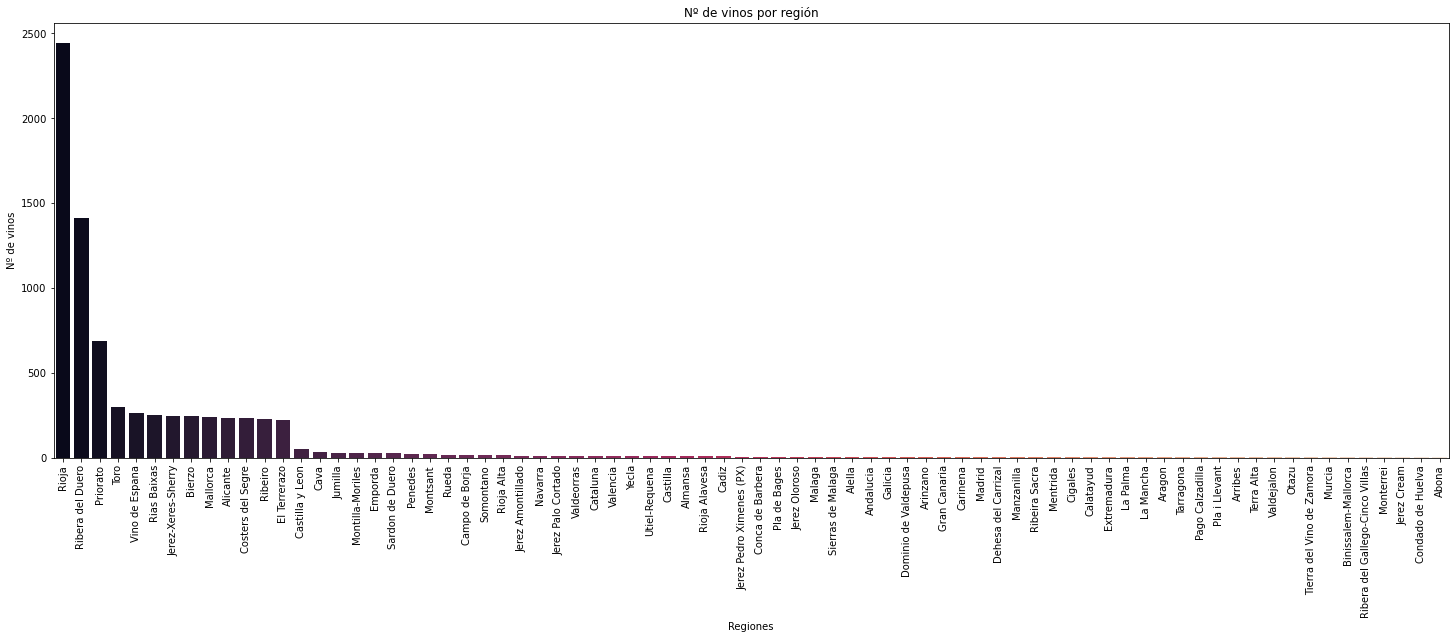

In [9]:
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=90)
sns.countplot(x="region", data=vinos, palette="rocket",order = vinos['region'].value_counts().index).set(title='Nº de vinos por región');
plt.xlabel("Regiones")
plt.ylabel("Nº de vinos")

Text(0, 0.5, 'Nº de vinos')

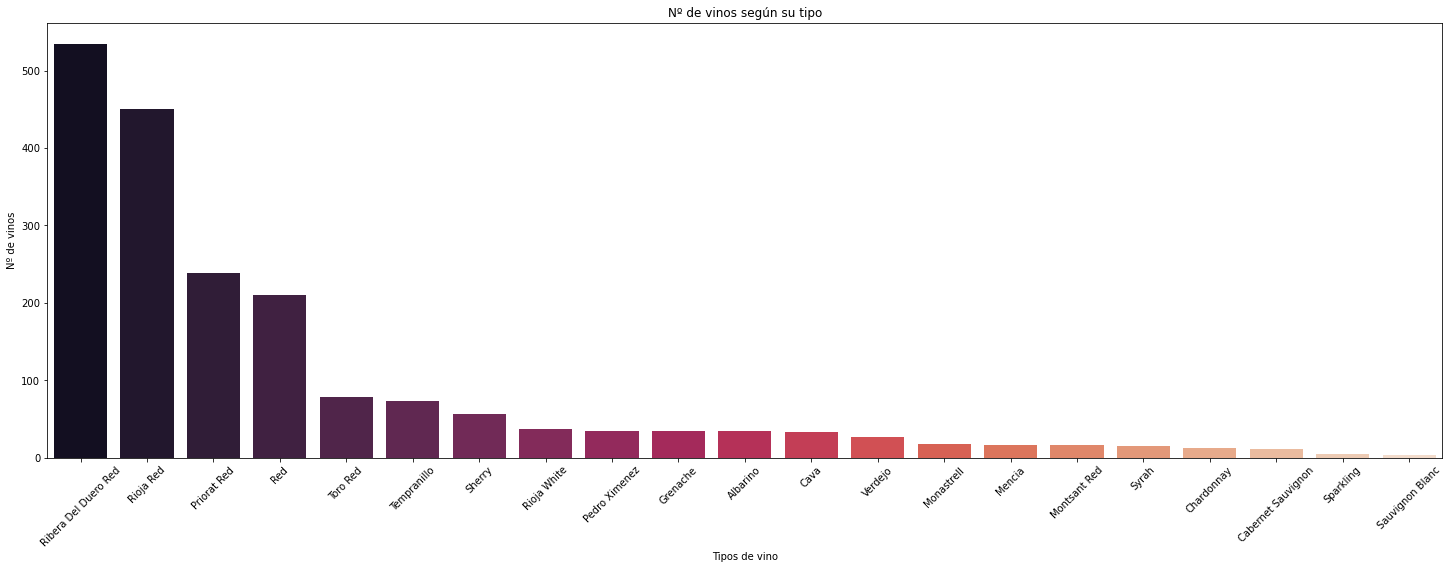

In [50]:
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=45)
sns.countplot(x="type", data=vinos, palette="rocket", order = vinos['type'].value_counts().index).set(title='Nº de vinos según su tipo');
plt.xlabel("Tipos de vino")
plt.ylabel("Nº de vinos")

Text(0, 0.5, 'Nº de vinos')

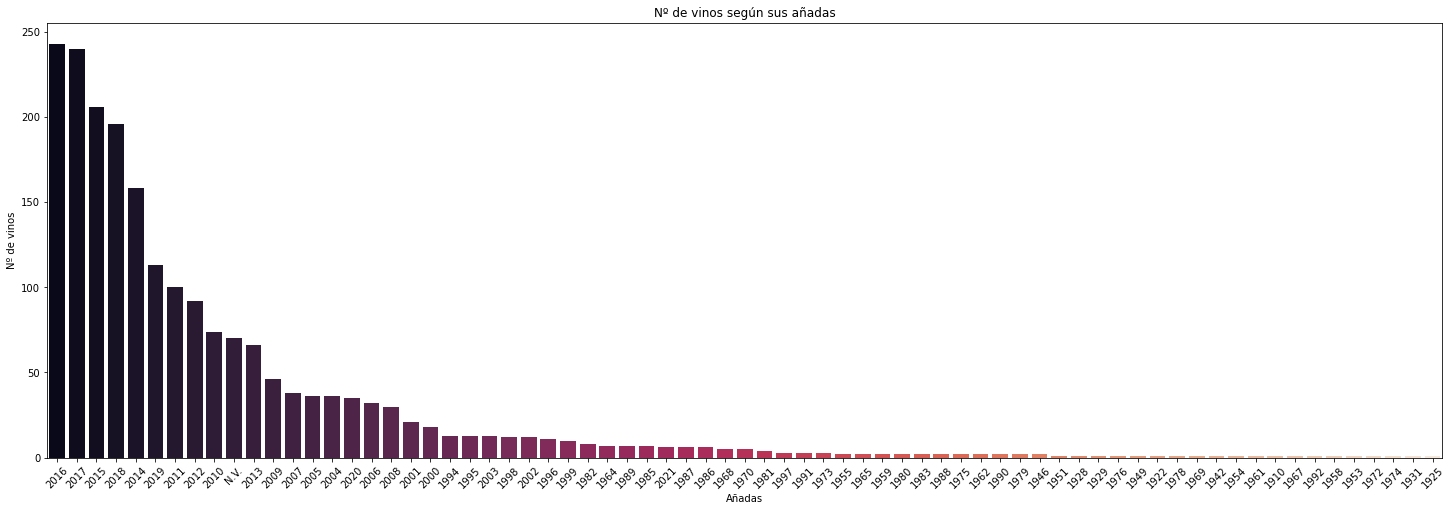

In [21]:
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=45)
sns.countplot(x="year", data=vinos, palette="rocket", order = vinos['year'].value_counts().index).set(title='Nº de vinos según sus añadas');
plt.xlabel("Añadas")
plt.ylabel("Nº de vinos")

<font color = 'violet'> En esta gráfica podemos ver la cantidad de vinos que hay por año. Recordamos que el año "N.V." son los vinos de Jerez.

<font color = 'violet'> Graficamos cuántos vinos hay según intervalos de precio

In [51]:
vinos["price_interval"]= pd.cut(vinos["price"], bins = 10, right= True, ordered=True, precision=1)
vinos.head(2)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity,price_interval
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.0,Toro Red,5.0,3.0,"(939.2, 1250.6]"
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.5,Tempranillo,4.0,2.0,"(1.9, 316.4]"


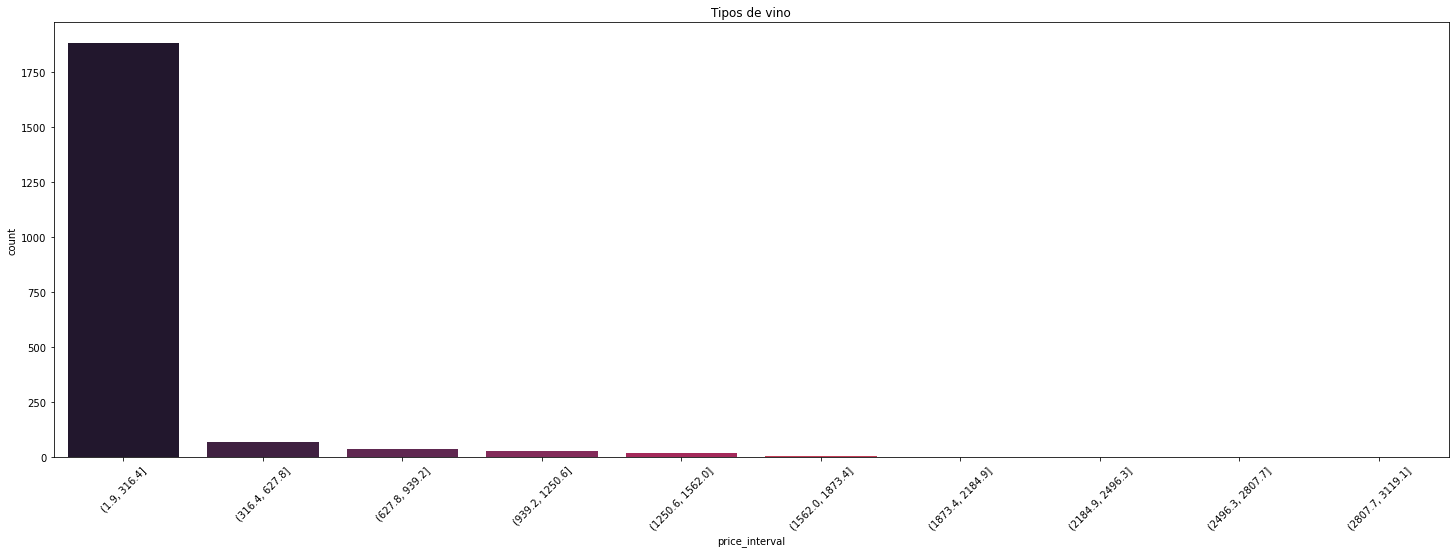

In [52]:
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=45)
sns.countplot(x="price_interval", data=vinos, palette="rocket").set(title='Tipos de vino');

#### 3. Realiza el ajuste lineal simple utilizando diversas métricas y realiza una gráfica mostrando los resultados.

<font color='violet'> Para este ejercicio hemos elegido las variables 'price' y 'num_reviews'.

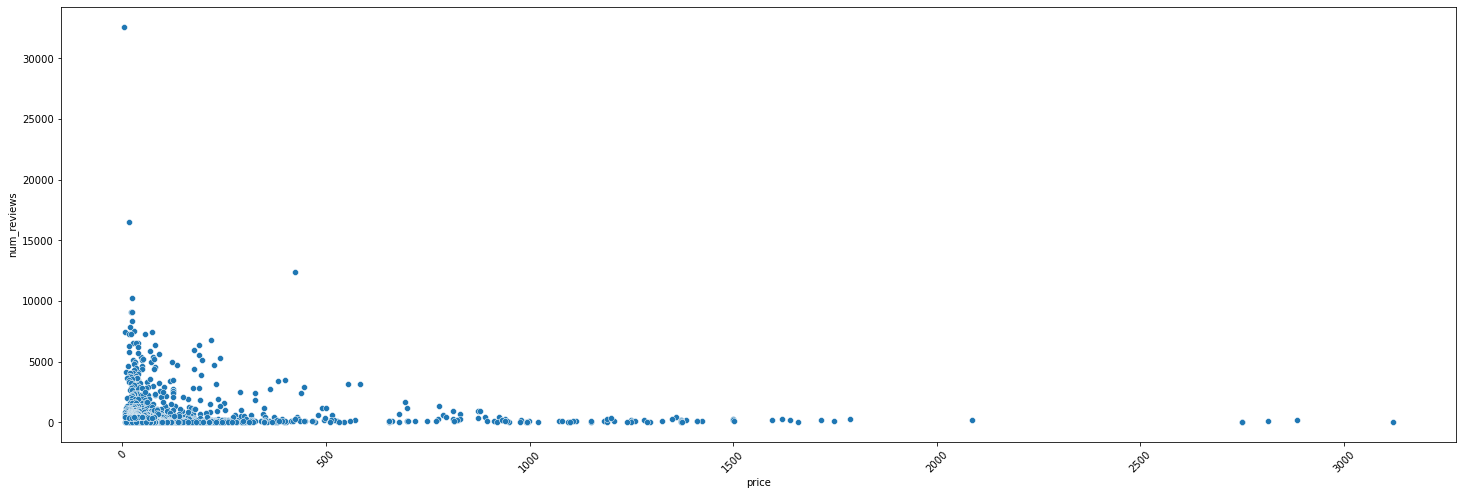

In [53]:
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=45)
sns.scatterplot(x="price", y = 'num_reviews', data=vinos, palette="rocket");

In [54]:
x=vinos['num_reviews'].values.reshape(-1, 1)
y= vinos['price'].values.reshape(-1, 1)

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42) 

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42) 
LR = LinearRegression(n_jobs=-1)
LR.fit(x_train, y_train)
y_predict_train = LR.predict(x_train)
y_prediction = LR.predict(x_test)

<font color='violet'> Después de haber generado el modelo con nuestros datos separados en entrenamiento y testeo, vamos a representarlo gráficamente

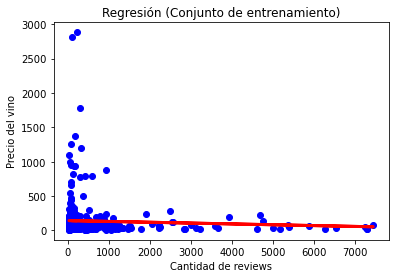

In [56]:
plt.scatter(x_test,y_test,color="blue")  
plt.plot(x_test,y_prediction,color="red",linewidth=3) 
plt.title('Regresión (Conjunto de entrenamiento)')
plt.xlabel('Cantidad de reviews')
plt.ylabel('Precio del vino')
plt.show()

<font color='violet'> Calculamos analíticamente las métricas de nuestro modelo

In [57]:
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_predict_train))
print('El MAE es',mean_absolute_error(y_train,y_predict_train))
print('El MSE es',mean_squared_error(y_train,y_predict_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_predict_train)))


print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_prediction))
print('El MAE es',mean_absolute_error(y_test,y_prediction))
print('El MSE es',mean_squared_error(y_test,y_prediction))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_prediction)))

Para el conjunto train:---------------
El valor de r2 score es  0.004051299071089254
El MAE es 137.89015910758374
El MSE es 73030.72252376835
EL RMSE es  270.24197032246553
Para el conjunto test:---------------
El valor de r2 score es  0.004902316520782102
El MAE es 128.7428316090749
El MSE es 76523.35057566763
EL RMSE es  276.62854259036186


<font color='violet'>  Podemos observar que la bondad de ajuste es muy baja. Vemos que el R2 es prácticamente 0, lo que quiere decir que nuestro modelo no predice nuestros datos porque no es representativo. Nuestro modelo no explica cómo varia nuestra v. respuesta. Tendremos que escoger otro tipo de modelo para modelar nuestros datos

<font color='violet'> El MAE, MSE y RMSE evalúan el modelo de regresión que hemos generado. En general, podremos decir que a valores más pequeños, nuestro modelo de regresión es mejor. Podemos comprobar con nuestros resultados que los tres son valores bastante altos, lo que concuerda con el valor de R2 y con la conclusión de que debemos escoger otro modelo.

#### 4. Interpretación de los resultados.
Ahora interpreta los resultados obtenidos del ajuste lineal simple y explica lo mejor posible la naturaleza de los mismos.

<font color='violet'> Hemos interpretado los resultados a lo largo de todo el cógido.

<font color='violet'> Ahora vamos a intentar modelar las variables `precio` y `rating`

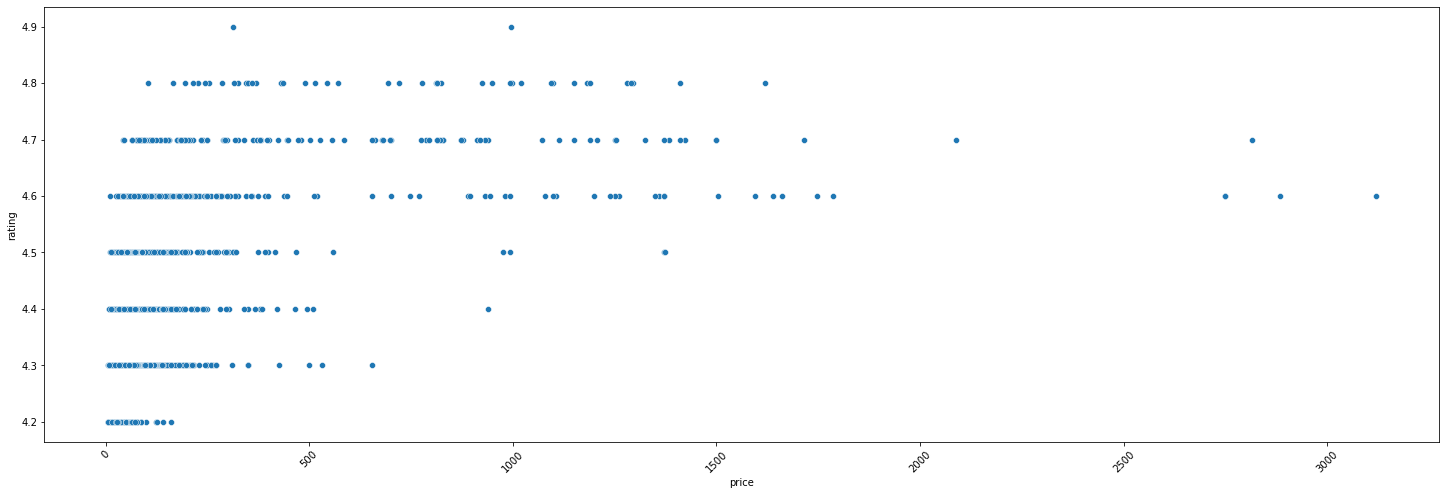

In [58]:
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=45)
sns.scatterplot(x="price", y = 'rating', data=vinos, palette="rocket");

In [59]:
x1=vinos['rating'].values.reshape(-1, 1)
y1= vinos['price'].values.reshape(-1, 1)

In [60]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 42) 

In [61]:

LR1 = LinearRegression(n_jobs=-1)
LR1.fit(x1_train, y1_train)
y1_predict_train = LR1.predict(x1_train)
y1_prediction = LR1.predict(x1_test)

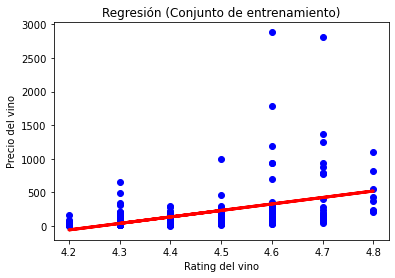

In [62]:
plt.scatter(x1_test,y1_test,color="blue")  
plt.plot(x1_test,y1_prediction,color="red",linewidth=3) 
plt.title('Regresión (Conjunto de entrenamiento)')
plt.xlabel('Rating del vino')
plt.ylabel('Precio del vino')
plt.show()

In [67]:
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y1_train,y1_predict_train))
print('El MAE es',mean_absolute_error(y1_train,y1_predict_train))
print('El MSE es',mean_squared_error(y1_train,y1_predict_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y1_train,y1_predict_train)))


print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y1_test,y1_prediction))
print('El MAE es',mean_absolute_error(y1_test,y1_prediction))
print('El MSE es',mean_squared_error(y1_test,y1_prediction))
print('EL RMSE es ',np.sqrt(mean_squared_error(y1_test,y1_prediction)))

Para el conjunto train:---------------
El valor de r2 score es  0.27561736516483626
El MAE es 120.95031022453942
El MSE es 53117.381604435795
EL RMSE es  230.47208421940346
Para el conjunto test:---------------
El valor de r2 score es  0.18656209145229496
El MAE es 123.57816373879922
El MSE es 62553.652049209995
EL RMSE es  250.10728107995976


<font color='violet'> Podemos observar que en este caso nuestro R2 ha aumentado comparado con el de modelo con las variables `price` y `num_reviews` , lo que implica una mejora del modelo. Nuestro modelo explica un poco más las variaciones de nuestros datos.

<font color='violet'> Las métricas de MAE, MSE y RMSE han variado respecto del modelo con las otras variables, pero siguen siendo muy altas. Esto indica que la bondad de ajuste de nuestro modelo no es adecuada.

In [68]:
# para entender un poco más las métrias MAE, MSE y RMSE : https://towardsdatascience.com/comparing-robustness-of-mae-mse-and-rmse-6d69da870828